# **Goal**: Train a model to classify MRI images with and without tumors. 

# Load Dependencies

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import os
from PIL import Image

from sklearn.model_selection import train_test_split


# Examine the Data

Around 21,000 images of MRI photos in 4 subdirectories


* around 3,000 MRI photos of normal brains,
* around 6,000 of glioma tumor brains,
* around 6,000 of menigioma tumor brains, and 
* around 6,000 of pituitary tumor brains

In the following code, we created lists of tuples with the paths to our images as well as labels to our images using a `for` loop. 

In [3]:
# Function for importing data           
def labels(directory, shuffle=True, random_state=0):
    
    from sklearn.utils import shuffle
    
    # Lists to store data and labels
    data_path = []
    data_labels = []
    
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)

        if not os.path.isdir(label_dir):
            continue

        # Going into each folder and getting image path
        for image in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image)
            data_path.append(image_path)
            data_labels.append(label)
            
    if shuffle:
        data_path, data_labels = shuffle(data_path, data_labels, random_state=random_state)
            
    return data_path, data_labels



Creating a dictionary of lists of tuples to store the paths for the images so that we can display them. 

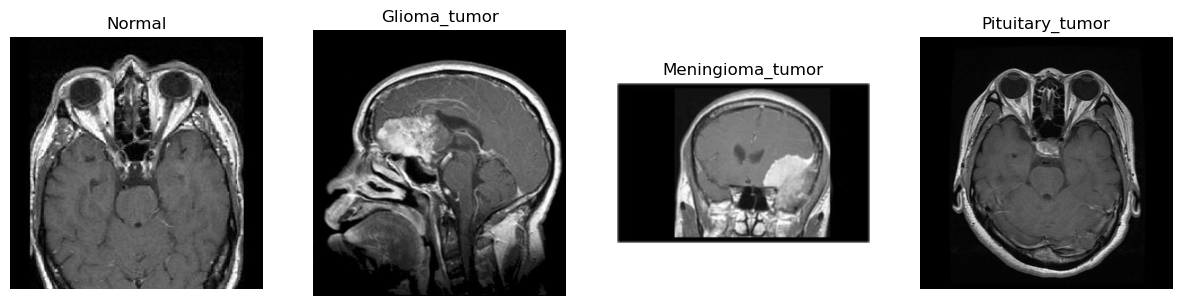

In [4]:
# Assigning variable to folder contiang all subfolder of images
data_folder = 'C:/Users/aloun/Desktop/Final_Project/Data'
# Make dictionary to hold folder and inside them will be the image path as a value
subfolders = {
    'Normal': [],
    'glioma_tumor': [],
    'meningioma_tumor': [],
    'pituitary_tumor': []
}
#  since there are branches to the photos, need to iterate through the directory to make tuples (collects data about
#directory), then segments tuples into "root" "dir" "files". Then iterate through files to find .jpg to get images
#iterate through subfolder dictionary to see what folder it is -- append the path to the image
for root, dirs, files in os.walk(data_folder):
    for file in files:
        if file.lower().endswith(('.jpg')):
            for subfolder in subfolders.keys():
                if subfolder in root:
                    subfolders[subfolder].append(os.path.join(root, file))
                    break
# Only show one photo of each folder
num_images_to_display = 3
plt.figure(figsize=(15, 10))
for subfolder, image_paths in subfolders.items():
    plt.subplot(1, len(subfolders), list(subfolders.keys()).index(subfolder) + 1)
    plt.title(subfolder.capitalize())
    plt.axis('off')
    for img_path in image_paths[:num_images_to_display]:
        img = Image.open(img_path)
        plt.imshow(img)
        plt.axis('off')
        break
plt.show()


# Import the Data

In [8]:
data_folder = 'C:/Users/aloun/Desktop/Final_Project/Data'
normal_mri = data_folder + r'/'
tumor_mri = data_folder + r'/Tumor'

In [9]:
norm_path, norm_label = labels(normal_mri, shuffle=False)
tum_path, tum_label = labels(tumor_mri, shuffle=False)

Directory: C:/Users/aloun/Desktop/Final_Project/Data/
label dir: C:/Users/aloun/Desktop/Final_Project/Data/Normal
label dir: C:/Users/aloun/Desktop/Final_Project/Data/Tumor
Directory: C:/Users/aloun/Desktop/Final_Project/Data/Tumor
label dir: C:/Users/aloun/Desktop/Final_Project/Data/Tumor\glioma_tumor
label dir: C:/Users/aloun/Desktop/Final_Project/Data/Tumor\meningioma_tumor
label dir: C:/Users/aloun/Desktop/Final_Project/Data/Tumor\pituitary_tumor


In [10]:
# data_folder = '/Users/madisubaiti/Desktop/Challenges/Final_Project/MRI info/Data'
output_folder = 'C:/Users/aloun/Desktop/Final_Project/MRI info/clean'
os.makedirs(output_folder, exist_ok=True)

# Data Cleaning

In [11]:
tum_label = [path.replace('_tumor', '').title() for path in tum_label]

# Data processing

In [12]:
paths_to_MRI = norm_path + tum_path
labels_of_MRI = norm_label + tum_label

train_paths, test_paths, train_labels, test_labels = train_test_split(
    paths_to_MRI, labels_of_MRI, test_size=0.35, random_state=42
)

In [13]:
# Dataframes:

train_df = pd.DataFrame({'path': train_paths, 'label': train_labels})
test_df = pd.DataFrame({'path': test_paths, 'label': test_labels})

In [14]:
# Mapping dictionary
tumor_classes = {'Normal': 0,
                 'Glioma': 1,
                 'Meningioma': 2,
                 'Pituitary': 3
}


# Apply mapping to both DataFrames
train_df['label_encoded'] = train_df['label'].map(tumor_classes)
test_df['label_encoded'] = test_df['label'].map(tumor_classes)

In [15]:
train_df.head()


,path,label,label_encoded
0,C:/Users/aloun/Desktop/Final_Project/Data/Norm...,Normal,0.0
1,C:/Users/aloun/Desktop/Final_Project/Data/Tumo...,Pituitary,3.0
2,C:/Users/aloun/Desktop/Final_Project/Data/Tumo...,Glioma,1.0
3,C:/Users/aloun/Desktop/Final_Project/Data/Norm...,Normal,0.0
4,C:/Users/aloun/Desktop/Final_Project/Data/Tumo...,Pituitary,3.0


In [16]:
test_df.head()

,path,label,label_encoded
0,C:/Users/aloun/Desktop/Final_Project/Data/Tumo...,Glioma,1
1,C:/Users/aloun/Desktop/Final_Project/Data/Tumo...,Glioma,1
2,C:/Users/aloun/Desktop/Final_Project/Data/Tumo...,Glioma,1
3,C:/Users/aloun/Desktop/Final_Project/Data/Tumo...,Pituitary,3
4,C:/Users/aloun/Desktop/Final_Project/Data/Tumo...,Pituitary,3


# Training Model

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

model = Sequential()

# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 50)        1400      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 75)        33825     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 75)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 75)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 125)       84500     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 125)        0         
 2D)                                                    

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 10
history = model.fit(train_generator, epochs=epochs, validation_data=test_generator)
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy:.4f}")

In [26]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

data_df = pd.DataFrame({'path': paths_to_MRI, 'label': labels_of_MRI})
# Apply mapping to labels
data_df['label_encoded'] = data_df['label'].map(tumor_classes)
# Split data into train and test sets
train_df, test_df = train_test_split(data_df, test_size=0.35, random_state=42)
# Define image size and batch size
image_size = (32, 32)
batch_size = 32
# Data generators for training and testing
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='path',
    y_col='label_encoded',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='raw'
)
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='path',
    y_col='label_encoded',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='raw'
)
# Define the CNN model
model = Sequential()
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
epochs = 10
history = model.fit(train_generator, epochs=epochs, validation_data=test_generator)
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy:.4f}")

Found 14085 validated image filenames.


c:\Users\aloun\anaconda3\envs\temp\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 3 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  warnings.warn(


Found 7587 validated image filenames.
Epoch 1/10
441/441 [==============================] - 646s 1s/step - loss: 1.0448 - accuracy: 0.5398 - val_loss: 1.7393 - val_accuracy: 0.2485
Epoch 2/10
441/441 [==============================] - 88s 199ms/step - loss: 0.8512 - accuracy: 0.6330 - val_loss: 1.0610 - val_accuracy: 0.5188
Epoch 3/10
441/441 [==============================] - 89s 202ms/step - loss: 0.7744 - accuracy: 0.6754 - val_loss: 1.1939 - val_accuracy: 0.4803
Epoch 4/10
441/441 [==============================] - 91s 206ms/step - loss: 0.7100 - accuracy: 0.7070 - val_loss: 0.6850 - val_accuracy: 0.7011
Epoch 5/10
441/441 [==============================] - 95s 214ms/step - loss: 0.6595 - accuracy: 0.7311 - val_loss: 0.7391 - val_accuracy: 0.6719
Epoch 6/10
441/441 [==============================] - 90s 203ms/step - loss: 0.6031 - accuracy: 0.7602 - val_loss: 0.7070 - val_accuracy: 0.7058
Epoch 7/10
441/441 [==============================] - 89s 203ms/step - loss: 0.5666 - accuracy